# Ch.02 "Training Simple Machine Learning Algorithms for Classification"

## The perceptron learning rule

1. Initialize the weights and bias unit to 0 or small random numbers
2. For each training example, $x^{(i)}$:

    a. Compute the output value $\hat{y}^{ (i)}$.
   
    b. Update the weights and bias unit

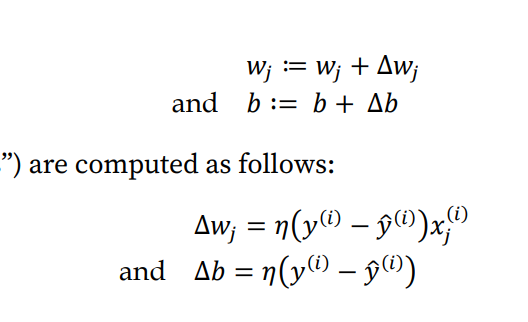

In [1]:
from IPython.display import Image
Image('./Images/update_w_b.PNG')

## Implementing a perceptron learning algorithm in Python

In [9]:
import numpy as np

class Perceptron:
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y):
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            
            for xi, target in zip(X, y):
                update = self.eta* (target - self.predict(xi))
                self.w_ += update *xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    
    def net_input(self, X):
        return np.dot(X,self.w_) + self.b_
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
          

## Training a perceptron model on the Iris dataset

In [1]:
import os
import pandas as pd
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print(s)

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.iloc[:100,4].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: 4, dtype: int64

## Scatter plot of setosa and versicolor flowers by sepal and petal length

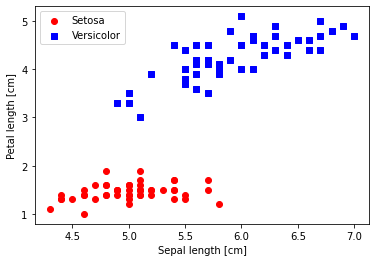

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[:100,4].values
y = np.where(y == 'Iris-setosa',0,1)

# etract sepal length and petal length
X = df.iloc[:100,[0,2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red',marker='o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue',marker='s', label = 'Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Build the model

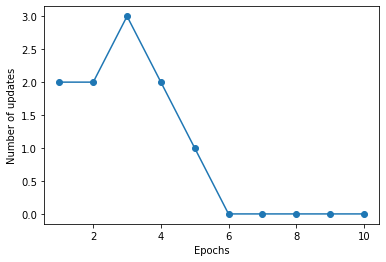

In [10]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker= 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Plot Decision Regions

In [14]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
     # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
 
     # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')


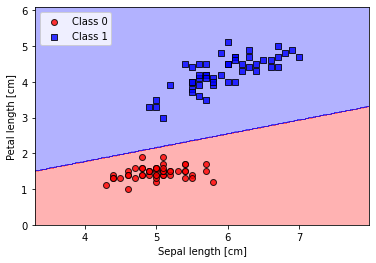

In [15]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Perceptron convergence
**Although the perceptron classified the two Iris flower classes perfectly, convergence is 
one of the biggest problems of the perceptron. Rosenblatt proved mathematically that 
the perceptron learning rule converges if the two classes can be separated by a linear hyperplane. However, if the classes cannot be separated perfectly by such a linear decision boundary, the weights will never stop updating unless we set a maximum number of epochs**